In [1]:
from platform import python_version

print(python_version())

3.6.5


## High Entropy Alloy(HEA) Classifier


---
This is the first submodule of our work which classifies if the given input is HEA or non-HEA


In [1]:
from sklearn.svm import SVC,NuSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from hypopt import GridSearch
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive

Loading Dataset for classifier

In [2]:
main_hea = pd.read_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Final_HEA_Classifier.csv")
main_hea.fillna(0, inplace = True)
main_hea.columns

Index(['Unnamed: 0', 'Alloy', 'Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg',
       'Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe',
       'Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo',
       'Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt', 'Length',
       'HEA/Non-HEA', 'As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu',
       'F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P',
       'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W',
       'Y', 'Tc'],
      dtype='object')

In [3]:
main_hea.isnull().values.any()

False

Train-Test Split on compiled dataset is shown below and train and test sets are saved as .csv format which can be directly used for loading into models.

In [4]:
features = ['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg','Gd', 'Au', 'Si', 'Zn', 'Ce', 'Hf', 'Ti', 'Ga', 'Dy', 'Co', 'Er', 'Fe','Ho', 'La', 'Lu', 'Nd', 'Pr', 'Tb', 'Ta', 'Pd', 'Sm', 'Tm', 'Be', 'Mo','Li', 'In', 'Mn', 'Sn', 'Sc', 'Yb', 'Cr', 'Pb', 'Ge', 'Pt','As', 'B', 'Ba', 'Bi', 'Br', 'C', 'Cd', 'Cl', 'Cs', 'Eu','F', 'H', 'Hg', 'I', 'Ir', 'K', 'N', 'Na', 'Ne', 'Ns', 'O', 'Os', 'P','Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Se', 'Sr', 'Te', 'Tl', 'V', 'W','Y', 'Tc']
X = main_hea[features]#, errors = 'ignore'.astype('float').values
y = main_hea['HEA/Non-HEA'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)


X_train.to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Classifier_sets/random_state_0/Classifier_X_train.csv", index=False)
X_test.to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Classifier_sets/random_state_0/Classifier_X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Classifier_sets/random_state_0/Classifier_y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Classifier_sets/random_state_0/Classifier_y_test.csv", index=False)


In [5]:
print(type(y_train),y_train.shape)

<class 'numpy.ndarray'> (1320,)


In [6]:
from sklearn.preprocessing import StandardScaler
# Defining Scaling
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

import pickle
pickle.dump(scaler, open('C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Scalars/random_state_0/classifier_sd_scaler.sav', 'wb'))

Train and Test set feature and label shapes

In [7]:
print(x_train_scaled.shape, y_train.shape, x_test_scaled.shape, y_test.shape)

(1320, 79) (1320,) (567, 79) (567,)


Logistic Regression

In [11]:
penalty = ["l1", "l2","elasticnet"] 
intercept_scaling = [x for x in np.arange(0.6,1.4,0.2)]
C =  [x for x in np.arange(0,1.2,0.05)] 
tol = [x for x in np.arange(0,0.004,0.0005)] 
random_state=[0]

random_grid = {'penalty': penalty,
               'tol': tol,
               'C':C,
               'random_state':random_state
               }
              
lr = GridSearch(model = LogisticRegression(),param_grid=random_grid,cv_folds=5)    
lr_model = lr.fit(x_train_scaled, np.array(y_train))

In [12]:
lr_model.get_params()

{'C': 0.8,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0,
 'verbose': 0,
 'warm_start': False}

Support Vector Classifier(SVC)

In [13]:
kernel = ["linear", "poly", "rbf", "sigmoid"] 
degree = [2,3,4]
coef0 = [x for x in np.arange(0,0.5,0.05)]
C =  [x for x in np.arange(0,1.2,0.05)]
tol = [x for x in np.arange(0,0.002,0.0005)]
random_state=[0]
probability = [True]

random_grid = {'kernel': kernel,
               'degree': degree,
               'coef0':coef0,
               'C':C,
               'tol':tol,
               'random_state':random_state,
               'probability':probability
               }
             
svc = GridSearch(model = SVC(),param_grid=random_grid,cv_folds=5)    
svc_model = svc.fit(x_train_scaled, np.array(y_train))

In [14]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.0005,
 'verbose': False}

Nu-Support Vector Classifier(NuSVC)

In [16]:
nu = [x for x in np.arange(0,0.7,0.025)] 
kernel = ["linear", "poly", "rbf", "sigmoid"] 
degree = [2,3,4]
coef0 = [x for x in np.arange(0,0.4,0.05)] 
probability = [True]
random_state=[0]

random_grid = {'kernel': kernel,
               'degree': degree,
               'coef0':coef0,
               'nu':nu,
               'random_state':random_state,
               'probability':probability
               }
              
nusvc = GridSearch(model = NuSVC(),param_grid=random_grid,cv_folds=5)    
nusvc_model = nusvc.fit(x_train_scaled, np.array(y_train))


In [17]:
nusvc_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.375,
 'probability': True,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Stochastic Gradient Descent(SGD) Classifier

In [20]:
penalty = ["l1", "l2","elasticnet"] 
alpha = [x for x in np.arange(0.0001,0.0002,0.00005)] 
tol = [x for x in np.arange(0,0.002,0.0005)] 
random_state=[0]
loss = ['modified_huber']

random_grid = {'penalty': penalty,
               'alpha': alpha,
               'tol':tol,
               'random_state':random_state,
               'loss':loss
               }
             
sgd = GridSearch(model = SGDClassifier(),param_grid=random_grid,cv_folds=5)    
sgd_model = sgd.fit(x_train_scaled, np.array(y_train))

In [21]:
sgd_model.get_params()

{'alpha': 0.00015000000000000001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'tol': 0.0,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

KNeighbors Classifier

In [22]:
leaf_size = list(range(25,40)) 
n_neighbors = list(range(3,12))
algorithm = ["auto", "ball_tree", "kd_tree","brute"]
p = [1,2]

random_grid = {'leaf_size': leaf_size,
               'n_neighbors': n_neighbors,
               'algorithm':algorithm,
               'p':p
               }
              
knc = GridSearch(model = KNeighborsClassifier(),param_grid=random_grid,cv_folds=5)    
kneighbors_model = knc.fit(x_train_scaled, np.array(y_train))

In [23]:
kneighbors_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 25,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'uniform'}

Gradient Boosting Classifier

In [8]:
n_estimators = list(range(80,105)) 
min_samples_split = list(range(2,4)) 
max_depth = list(range(1,12)) 
min_samples_leaf = list(range(1,3)) 

learning_rate = list(np.arange(0,0.35,0.05)) 
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'learning_rate':learning_rate,
               'random_state':random_state
               }
              
gbc = GridSearch(model = GradientBoostingClassifier(),param_grid=random_grid,cv_folds=5)    
gradientBoosting_model = gbc.fit(x_train_scaled, np.array(y_train))

In [9]:
gradientBoosting_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.25,
 'loss': 'deviance',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 94,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

AdaBoost Classifier

In [26]:
n_estimators = list(range(40,150)) 
learning_rate = list(np.arange(1,3,0.25)) 
algorithm = ['SAMME','SAMME.R']
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'algorithm':algorithm,
               'random_state':random_state
               }
              
abc = GridSearch(model = AdaBoostClassifier(),param_grid=random_grid,cv_folds=5)    
AdaBoost_model = abc.fit(x_train_scaled, np.array(y_train))

In [27]:
AdaBoost_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.75,
 'n_estimators': 98,
 'random_state': 0}

Random Forest Classifier

In [28]:
n_estimators = list(range(70,130)) 
min_samples_split = list(range(2,4)) 
max_depth = list(range(1,15))
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'max_features':max_features,
               'random_state':random_state
               }
              
rfc = GridSearch(model = RandomForestClassifier(),param_grid=random_grid,cv_folds=5)    
RFC_model = rfc.fit(x_train_scaled, np.array(y_train))

In [29]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 13,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 84,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Extreme Gradient Boosting (XGB) Classifier

In [30]:
booster = ['gbtree', 'gblinear', 'dart']
eta = list(np.arange(0,1, 0.05)) 
max_depth = list(range(3,10)) 

random_grid = {'booster': booster,
               'eta': eta,
               'max_depth':max_depth
               }
              
xgbc = GridSearch(model = XGBClassifier(),param_grid=random_grid,cv_folds=5)    
XGB_Classifier_model = xgbc.fit(x_train_scaled, np.array(y_train))

[22:25:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
XGB_Classifier_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.349999994,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 20,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'eta': 0.35000000000000003}

Decision Tree Classifier

In [32]:
min_samples_split = list(range(2,5)) 
max_depth = list(range(1,15)) 
min_samples_leaf = list(range(1,3)) 
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'random_state':random_state
               }
         
dtc = GridSearch(model = DecisionTreeClassifier(),param_grid=random_grid,cv_folds=5)    
DTC_model = dtc.fit(x_train_scaled, np.array(y_train))

In [33]:
DTC_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Extra Trees Classifier

In [34]:
n_estimators = list(range(70,130))
min_samples_split = list(range(2,5)) 
max_depth = list(range(1,12)) 
min_samples_leaf = list(range(1,3)) 
max_features = ["auto", "sqrt", "log2"]
random_state = [0]

random_grid = {
               'n_estimators':n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'random_state':random_state
               }
              
etc = GridSearch(model = ExtraTreesClassifier(),param_grid=random_grid,cv_folds=5)    
ExtraTreesClassifier_model = etc.fit(x_train_scaled, np.array(y_train))

In [35]:
ExtraTreesClassifier_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 111,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Gaussian Naive Bayes(GaussianNB) Classifier

In [36]:
var_smoothing = [x for x in np.arange(0.0000000005,0.000000003,0.0000000005)]

random_grid = {
               'var_smoothing':var_smoothing
               }

gnb = GridSearch(model = GaussianNB(),param_grid=random_grid,cv_folds=5)    
GaussianNB_model = gnb.fit(x_train_scaled, np.array(y_train))

In [37]:
GaussianNB_model.get_params()

{'priors': None, 'var_smoothing': 5e-10}

Saving Models

In [39]:
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_logistic_regression.sav'
pickle.dump(lr_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_SVC.sav'
pickle.dump(svc_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_NuSVC.sav'
pickle.dump(nusvc_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_SGD.sav'
pickle.dump(sgd_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_kneighbors.sav'
pickle.dump(kneighbors_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_gradientBoosting.sav'
pickle.dump(gradientBoosting_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_adaBoosting.sav'
pickle.dump(AdaBoost_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_randomForestClassifier.sav'
pickle.dump(RFC_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_XGB_Classifier.sav'
pickle.dump(XGB_Classifier_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_DecisionTree_Classifier.sav'
pickle.dump(DTC_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_ExtraTreesClassifier.sav'
pickle.dump(ExtraTreesClassifier_model, open(filename, 'wb'))
filename = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/classifier_GaussianNB.sav'
pickle.dump(GaussianNB_model, open(filename, 'wb'))

Computing Metrics

In [40]:
# Logistic Regression Metrics
train_pred = lr_model.predict(x_train_scaled)
test_pred = lr_model.predict(x_test_scaled)

lr_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
lr_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

lr_Precision_Train = precision_score(np.array(y_train), train_pred)
lr_Precision_Test = precision_score(np.array(y_test), test_pred)

lr_Recall_Train = recall_score(np.array(y_train), train_pred)
lr_Recall_Test = recall_score(np.array(y_test), test_pred)

lr_f1_score_Train = f1_score(np.array(y_train), train_pred)
lr_f1_score_Test = f1_score(np.array(y_test), test_pred)

lr_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
lr_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

lr_cross_val_score_Train = list(cross_val_score(lr_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )

# Support Vector Classifier Metrics
train_pred = svc_model.predict(x_train_scaled)
test_pred = svc_model.predict(x_test_scaled)

svc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
svc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

svc_Precision_Train = precision_score(np.array(y_train), train_pred)
svc_Precision_Test = precision_score(np.array(y_test), test_pred)

svc_Recall_Train = recall_score(np.array(y_train), train_pred)
svc_Recall_Test = recall_score(np.array(y_test), test_pred)

svc_f1_score_Train = f1_score(np.array(y_train), train_pred)
svc_f1_score_Test = f1_score(np.array(y_test), test_pred)

svc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
svc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

svc_cross_val_score_Train = list(cross_val_score(svc_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# NuSVC Metrics
train_pred = nusvc_model.predict(x_train_scaled)
test_pred = nusvc_model.predict(x_test_scaled)

nusvc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
nusvc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

nusvc_Precision_Train = precision_score(np.array(y_train), train_pred)
nusvc_Precision_Test = precision_score(np.array(y_test), test_pred)

nusvc_Recall_Train = recall_score(np.array(y_train), train_pred)
nusvc_Recall_Test = recall_score(np.array(y_test), test_pred)

nusvc_f1_score_Train = f1_score(np.array(y_train), train_pred)
nusvc_f1_score_Test = f1_score(np.array(y_test), test_pred)

nusvc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
nusvc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

nusvc_cross_val_score_Train = list(cross_val_score(nusvc_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Stochastic Gradient Descent Metrics
train_pred = sgd_model.predict(x_train_scaled)
test_pred = sgd_model.predict(x_test_scaled)

sgd_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
sgd_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

sgd_Precision_Train = precision_score(np.array(y_train), train_pred)
sgd_Precision_Test = precision_score(np.array(y_test), test_pred)

sgd_Recall_Train = recall_score(np.array(y_train), train_pred)
sgd_Recall_Test = recall_score(np.array(y_test), test_pred)

sgd_f1_score_Train = f1_score(np.array(y_train), train_pred)
sgd_f1_score_Test = f1_score(np.array(y_test), test_pred)

sgd_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
sgd_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

sgd_cross_val_score_Train = list(cross_val_score(sgd_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# KNeighbors Metrics
train_pred = kneighbors_model.predict(x_train_scaled)
test_pred = kneighbors_model.predict(x_test_scaled)

knc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
knc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

knc_Precision_Train = precision_score(np.array(y_train), train_pred)
knc_Precision_Test = precision_score(np.array(y_test), test_pred)

knc_Recall_Train = recall_score(np.array(y_train), train_pred)
knc_Recall_Test = recall_score(np.array(y_test), test_pred)

knc_f1_score_Train = f1_score(np.array(y_train), train_pred)
knc_f1_score_Test = f1_score(np.array(y_test), test_pred)

knc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
knc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

knc_cross_val_score_Train = list(cross_val_score(kneighbors_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


#Gradient Boosting Metrics
train_pred = gradientBoosting_model.predict(x_train_scaled)
test_pred = gradientBoosting_model.predict(x_test_scaled)

gbc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
gbc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

gbc_Precision_Train = precision_score(np.array(y_train), train_pred)
gbc_Precision_Test = precision_score(np.array(y_test), test_pred)

gbc_Recall_Train = recall_score(np.array(y_train), train_pred)
gbc_Recall_Test = recall_score(np.array(y_test), test_pred)

gbc_f1_score_Train = f1_score(np.array(y_train), train_pred)
gbc_f1_score_Test = f1_score(np.array(y_test), test_pred)

gbc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
gbc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

gbc_cross_val_score_Train = list(cross_val_score(gradientBoosting_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# AdaBoost Metrics
train_pred = AdaBoost_model.predict(x_train_scaled)
test_pred = AdaBoost_model.predict(x_test_scaled)

abc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
abc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

abc_Precision_Train = precision_score(np.array(y_train), train_pred)
abc_Precision_Test = precision_score(np.array(y_test), test_pred)

abc_Recall_Train = recall_score(np.array(y_train), train_pred)
abc_Recall_Test = recall_score(np.array(y_test), test_pred)

abc_f1_score_Train = f1_score(np.array(y_train), train_pred)
abc_f1_score_Test = f1_score(np.array(y_test), test_pred)

abc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
abc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

abc_cross_val_score_Train = list(cross_val_score(AdaBoost_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Random Forest Metrics
train_pred = RFC_model.predict(x_train_scaled)
test_pred = RFC_model.predict(x_test_scaled)

rfc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
rfc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

rfc_Precision_Train = precision_score(np.array(y_train), train_pred)
rfc_Precision_Test = precision_score(np.array(y_test), test_pred)

rfc_Recall_Train = recall_score(np.array(y_train), train_pred)
rfc_Recall_Test = recall_score(np.array(y_test), test_pred)

rfc_f1_score_Train = f1_score(np.array(y_train), train_pred)
rfc_f1_score_Test = f1_score(np.array(y_test), test_pred)

rfc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
rfc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

rfc_cross_val_score_Train = list(cross_val_score(RFC_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Extreme Gradient Boosting Metrics
train_pred = XGB_Classifier_model.predict(x_train_scaled)
test_pred = XGB_Classifier_model.predict(x_test_scaled)

xgbc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
xgbc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

xgbc_Precision_Train = precision_score(np.array(y_train), train_pred)
xgbc_Precision_Test = precision_score(np.array(y_test), test_pred)

xgbc_Recall_Train = recall_score(np.array(y_train), train_pred)
xgbc_Recall_Test = recall_score(np.array(y_test), test_pred)

xgbc_f1_score_Train = f1_score(np.array(y_train), train_pred)
xgbc_f1_score_Test = f1_score(np.array(y_test), test_pred)

xgbc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
xgbc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

xgbc_cross_val_score_Train = list(cross_val_score(XGB_Classifier_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


# Decision Tree Metrics
train_pred = DTC_model.predict(x_train_scaled)
test_pred = DTC_model.predict(x_test_scaled)

dtc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
dtc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

dtc_Precision_Train = precision_score(np.array(y_train), train_pred)
dtc_Precision_Test = precision_score(np.array(y_test), test_pred)

dtc_Recall_Train = recall_score(np.array(y_train), train_pred)
dtc_Recall_Test = recall_score(np.array(y_test), test_pred)

dtc_f1_score_Train = f1_score(np.array(y_train), train_pred)
dtc_f1_score_Test = f1_score(np.array(y_test), test_pred)

dtc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
dtc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

dtc_cross_val_score_Train = list(cross_val_score(DTC_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


#Extra Trees Classifier Metrics
train_pred = ExtraTreesClassifier_model.predict(x_train_scaled)
test_pred = ExtraTreesClassifier_model.predict(x_test_scaled)

etc_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
etc_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

etc_Precision_Train = precision_score(np.array(y_train), train_pred)
etc_Precision_Test = precision_score(np.array(y_test), test_pred)

etc_Recall_Train = recall_score(np.array(y_train), train_pred)
etc_Recall_Test = recall_score(np.array(y_test), test_pred)

etc_f1_score_Train = f1_score(np.array(y_train), train_pred)
etc_f1_score_Test = f1_score(np.array(y_test), test_pred)

etc_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
etc_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

etc_cross_val_score_Train = list(cross_val_score(ExtraTreesClassifier_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )


#GaussianNB Metrics

train_pred = GaussianNB_model.predict(x_train_scaled)
test_pred = GaussianNB_model.predict(x_test_scaled)

gnb_Accuracy_Train = accuracy_score(np.array(y_train), train_pred)
gnb_Accuracy_Test = accuracy_score(np.array(y_test), test_pred)

gnb_Precision_Train = precision_score(np.array(y_train), train_pred)
gnb_Precision_Test = precision_score(np.array(y_test), test_pred)

gnb_Recall_Train = recall_score(np.array(y_train), train_pred)
gnb_Recall_Test = recall_score(np.array(y_test), test_pred)

gnb_f1_score_Train = f1_score(np.array(y_train), train_pred)
gnb_f1_score_Test = f1_score(np.array(y_test), test_pred)

gnb_ROC_AUC_Score_Train = roc_auc_score(np.array(y_train), train_pred)
gnb_ROC_AUC_Score_Test = roc_auc_score(np.array(y_test), test_pred)

gnb_cross_val_score_Train = list(cross_val_score(GaussianNB_model, x_train_scaled, np.array(y_train), cv=KFold(n_splits=5,shuffle=True)) )

[00:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [41]:
models_classifier_comparison = pd.DataFrame({
    'Model'          : ['Logistic Regression', 'Support Vector Classifier', 'NuSVC', 'SGD Classifier', 'KNeighbors Classifier', 'Gradient Boosting Classifier', 'Adaboost Classifier', 'Random Forest Classifier', 'XGB Classifier', 'Decision Tree Classifier', 'Extra Trees Classifier', 'Gaussian Naive Bayes'],
    'Train Accuracy' : [lr_Accuracy_Train, svc_Accuracy_Train, nusvc_Accuracy_Train, sgd_Accuracy_Train, knc_Accuracy_Train, gbc_Accuracy_Train,abc_Accuracy_Train, rfc_Accuracy_Train, xgbc_Accuracy_Train, dtc_Accuracy_Train,etc_Accuracy_Train,gnb_Accuracy_Train],
    'Test Accuracy'  : [lr_Accuracy_Test, svc_Accuracy_Test, nusvc_Accuracy_Test, sgd_Accuracy_Test, knc_Accuracy_Test, gbc_Accuracy_Test,abc_Accuracy_Test, rfc_Accuracy_Test, xgbc_Accuracy_Test, dtc_Accuracy_Test,etc_Accuracy_Test,gnb_Accuracy_Test],
    'Train Precision': [lr_Precision_Train, svc_Precision_Train, nusvc_Precision_Train, sgd_Precision_Train, knc_Precision_Train, gbc_Precision_Train,abc_Precision_Train, rfc_Precision_Train, xgbc_Precision_Train, dtc_Precision_Train,etc_Precision_Train,gnb_Precision_Train],
    'Test Precision' : [lr_Precision_Test, svc_Precision_Test, nusvc_Precision_Test, sgd_Precision_Test, knc_Precision_Test, gbc_Precision_Test,abc_Precision_Test, rfc_Precision_Test, xgbc_Precision_Test, dtc_Precision_Test,etc_Precision_Test,gnb_Precision_Test],
    'Train Recall'   : [lr_Recall_Train, svc_Recall_Train, nusvc_Recall_Train, sgd_Recall_Train, knc_Recall_Train, gbc_Recall_Train,abc_Recall_Train, rfc_Recall_Train, xgbc_Recall_Train, dtc_Recall_Train,etc_Recall_Train,gnb_Recall_Train],
    'Test Recall'    : [lr_Recall_Test, svc_Recall_Test, nusvc_Recall_Test, sgd_Recall_Test, knc_Recall_Test, gbc_Recall_Test,abc_Recall_Test, rfc_Recall_Test, xgbc_Recall_Test, dtc_Recall_Test,etc_Recall_Test,gnb_Recall_Test],
    'Train F1_score' : [lr_f1_score_Train, svc_f1_score_Train, nusvc_f1_score_Train, sgd_f1_score_Train, knc_f1_score_Train, gbc_f1_score_Train,abc_f1_score_Train, rfc_f1_score_Train, xgbc_f1_score_Train, dtc_f1_score_Train,etc_f1_score_Train,gnb_f1_score_Train],
    'Test F1_score'  : [lr_f1_score_Test, svc_f1_score_Test, nusvc_f1_score_Test, sgd_f1_score_Test, knc_f1_score_Test, gbc_f1_score_Test,abc_f1_score_Test, rfc_f1_score_Test, xgbc_f1_score_Test, dtc_f1_score_Test,etc_f1_score_Test,gnb_f1_score_Test],
    'Train AUC_ROC'  : [lr_ROC_AUC_Score_Train, svc_ROC_AUC_Score_Train, nusvc_ROC_AUC_Score_Train, sgd_ROC_AUC_Score_Train, knc_ROC_AUC_Score_Train, gbc_ROC_AUC_Score_Train,abc_ROC_AUC_Score_Train, rfc_ROC_AUC_Score_Train, xgbc_ROC_AUC_Score_Train, dtc_ROC_AUC_Score_Train,etc_ROC_AUC_Score_Train,gnb_ROC_AUC_Score_Train],
    'Test AUC_ROC'   : [lr_ROC_AUC_Score_Test, svc_ROC_AUC_Score_Test, nusvc_ROC_AUC_Score_Test, sgd_ROC_AUC_Score_Test, knc_ROC_AUC_Score_Test, gbc_ROC_AUC_Score_Test,abc_ROC_AUC_Score_Test, rfc_ROC_AUC_Score_Test, xgbc_ROC_AUC_Score_Test, dtc_ROC_AUC_Score_Test,etc_ROC_AUC_Score_Test,gnb_ROC_AUC_Score_Test],
    'Cross_Validation_Scores_for_trainset':[lr_cross_val_score_Train, svc_cross_val_score_Train, nusvc_cross_val_score_Train, sgd_cross_val_score_Train, knc_cross_val_score_Train, gbc_cross_val_score_Train,abc_cross_val_score_Train, rfc_cross_val_score_Train, xgbc_cross_val_score_Train, dtc_cross_val_score_Train,etc_cross_val_score_Train,gnb_cross_val_score_Train],
    
    }, columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1_score', 'Test F1_score', 'Train AUC_ROC', 'Test AUC_ROC', 'Cross_Validation_Scores_for_trainset'])

models_classifier_comparison.sort_values(by='Test Accuracy', ascending=False)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train AUC_ROC,Test AUC_ROC,Cross_Validation_Scores_for_trainset
5,Gradient Boosting Classifier,0.902273,0.784832,0.904930,0.751092,0.872666,0.725738,0.888505,0.738197,0.899397,0.776506,"[0.7803030303030303, 0.7386363636363636, 0.75,..."
8,XGB Classifier,0.987879,0.768959,0.989744,0.726496,0.983022,0.717300,0.986371,0.721868,0.987407,0.761680,"[0.7651515151515151, 0.7727272727272727, 0.806..."
2,NuSVC,0.921212,0.761905,0.933810,0.716102,0.886248,0.713080,0.909408,0.714588,0.917816,0.755025,"[0.7613636363636364, 0.7537878787878788, 0.761..."
7,Random Forest Classifier,0.924242,0.758377,0.976608,0.731481,0.850594,0.666667,0.909256,0.697572,0.917089,0.745455,"[0.8181818181818182, 0.7575757575757576, 0.757..."
10,Extra Trees Classifier,0.873485,0.730159,0.973094,0.730769,0.736842,0.561181,0.838647,0.634845,0.860213,0.706348,"[0.7689393939393939, 0.7651515151515151, 0.731..."
1,Support Vector Classifier,0.762879,0.714286,0.781633,0.681159,0.650255,0.594937,0.709917,0.635135,0.751940,0.697468,"[0.7045454545454546, 0.7121212121212122, 0.700..."
4,KNeighbors Classifier,0.808333,0.712522,0.855932,0.688776,0.685908,0.569620,0.761546,0.623557,0.796443,0.692386,"[0.6856060606060606, 0.7083333333333334, 0.681..."
6,Adaboost Classifier,0.726515,0.705467,0.703571,0.637795,0.668930,0.683544,0.685814,0.659878,0.720922,0.702378,"[0.7045454545454546, 0.75, 0.6628787878787878,..."
0,Logistic Regression,0.712121,0.684303,0.692449,0.621849,0.638370,0.624473,0.664311,0.623158,0.704958,0.675873,"[0.6515151515151515, 0.75, 0.7045454545454546,..."
9,Decision Tree Classifier,0.768182,0.668430,0.724960,0.594595,0.774194,0.649789,0.748768,0.620968,0.768766,0.665804,"[0.696969696969697, 0.7121212121212122, 0.6590..."


[00:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


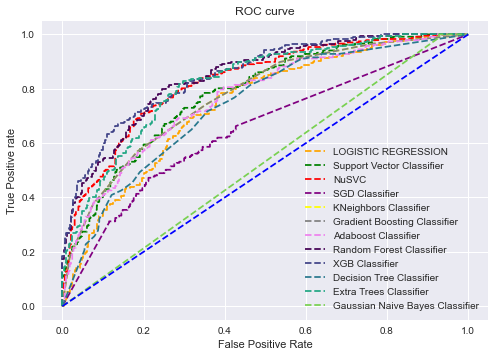

In [43]:
pred_prob1 = lr_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob2 = svc_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob3 = nusvc_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob4 = sgd_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob5 = kneighbors_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob6 = gradientBoosting_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob7 = AdaBoost_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob8 = RFC_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob9 = XGB_Classifier_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob10 = DTC_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob11 = ExtraTreesClassifier_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)
pred_prob12 = GaussianNB_model.fit(x_train_scaled, y_train).predict_proba(x_test_scaled)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)
fpr9, tpr9, thresh9 = roc_curve(y_test, pred_prob9[:,1], pos_label=1)
fpr10, tpr10, thresh10 = roc_curve(y_test, pred_prob10[:,1], pos_label=1)
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob11[:,1], pos_label=1)
fpr12, tpr12, thresh12 = roc_curve(y_test, pred_prob12[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LOGISTIC REGRESSION')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Support Vector Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='NuSVC')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='SGD Classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='KNeighbors Classifier')
plt.plot(fpr5, tpr5, linestyle='--',color='grey', label='Gradient Boosting Classifier')
plt.plot(fpr7, tpr7, linestyle='--',color='violet', label='Adaboost Classifier')
plt.plot(fpr8, tpr8, linestyle='--',color='#440154', label='Random Forest Classifier')
plt.plot(fpr9, tpr9, linestyle='--',color='#404387', label='XGB Classifier')
plt.plot(fpr10, tpr10, linestyle='--',color='#29788E', label='Decision Tree Classifier')
plt.plot(fpr11, tpr11, linestyle='--',color='#22A784', label='Extra Trees Classifier')
plt.plot(fpr12, tpr12, linestyle='--',color='#79D151', label='Gaussian Naive Bayes Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [44]:
models_classifier_comparison.to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Classifier Models/random_state_0/HEA_Classifier_results_dataframe.csv")

## Regression
---
This submodule is used to predict the bulk modulus values for the inputs 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold
from hypopt import GridSearch
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.neighbors import KNeighborsRegressor
import pickle

Data Loading and Scaling

In [12]:
bulk_hea = pd.read_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/HEA_BulkModulus.csv")
bulk_hea.fillna(str(0), inplace = True)#Checked manually due to some internal error, Ag is getting NaNs instead of 0s so replaced them. 
print(bulk_hea.isnull().values.any())
bulk_hea.columns

False


Index(['Unnamed: 0', 'Alloy', 'S_Phase', 'BulkModulus (GPa)', 'Ag', 'Al', 'As',
       'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co',
       'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H',
       'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn',
       'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb',
       'Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si',
       'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y',
       'Yb', 'Zn', 'Zr'],
      dtype='object')

In [13]:
set(bulk_hea["S_Phase"])

{'AM', 'AM+IM', 'IM', 'IM+SS', 'SS', 'SS+IM'}

In [14]:
one_hot_encoded_data = pd.get_dummies(bulk_hea, columns = ['S_Phase'])
one_hot_encoded_data.columns

Index(['Unnamed: 0', 'Alloy', 'BulkModulus (GPa)', 'Ag', 'Al', 'As', 'Au', 'B',
       'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs',
       'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg',
       'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N',
       'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pr',
       'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sm', 'Sn',
       'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn',
       'Zr', 'S_Phase_AM', 'S_Phase_AM+IM', 'S_Phase_IM', 'S_Phase_IM+SS',
       'S_Phase_SS', 'S_Phase_SS+IM'],
      dtype='object')

In [15]:
features = ['S_Phase_AM', 'S_Phase_AM+IM', 'S_Phase_IM', 'S_Phase_IM+SS','S_Phase_SS', 'S_Phase_SS+IM', 'Ag', 'Al', 'As','Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cl', 'Co','Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F', 'Fe', 'Ga', 'Gd', 'Ge', 'H','Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn','Mo', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Ni', 'Ns', 'O', 'Os', 'P', 'Pb','Pd', 'Pr', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si','Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Te', 'Ti', 'Tl', 'Tm', 'V', 'W', 'Y','Yb', 'Zn', 'Zr']
X = one_hot_encoded_data[features]#, errors = 'ignore'.astype('float').values
y = one_hot_encoded_data['BulkModulus (GPa)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

X_train.to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Regressor_sets/random_state_0/Regressor_X_train.csv", index=False)
X_test.to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Regressor_sets/random_state_0/Regressor_X_test.csv", index=False)
pd.DataFrame(y_train).to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Regressor_sets/random_state_0/Regressor_y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Regressor_sets/random_state_0/Regressor_y_test.csv", index=False)

In [16]:
from sklearn.preprocessing import StandardScaler
# Defining Scaling
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

import pickle
pickle.dump(scaler, open('C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Datasets/Scalars/random_state_0/regressor_sd_scaler.sav', 'wb'))

print(x_train_scaled.shape, y_train.shape, x_test_scaled.shape, y_test.shape)

(804, 84) (804,) (345, 84) (345,)


In [17]:
def RMSE(y_true,y_pred):
  RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
  return RMSE

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    #print 'MSE: %2.3f' % mse
    return mse

def adjusted_r_squared(X, y, r2_sc):
  Adj_r2 = 1 - (1-r2_sc) * (len(y)-1)/(len(y)-X.shape[1]-1)
  return Adj_r2

def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def MAPE(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

Random Forest Regressor

In [18]:
n_estimators = [100, 150, 200, 250, 300, 350, 500]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in range(5,90,5)]
criterion = ['mse', 'mae']
n_jobs = [-1]
random_state = [42]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               "criterion":criterion,
               'n_jobs':n_jobs,
               'random_state':random_state
               }

rf_gsc = GridSearch(model=RandomForestRegressor(),param_grid=random_grid,cv_folds=5)    
rf_model = rf_gsc.fit(x_train_scaled,y_train) #.values.ravel()

In [19]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Extreme Gradient Boosting(XGB) Regressor 

In [20]:
n_estimators = [int(x) for x in range(100,130,10)] # tradeoff b/w n_estimators and learning_rate
learning_rate = [x for x in np.arange(0.3,0.6,0.1)]
criterion = ['mae']
early_stopping_rounds = [3]
max_depth = [int(x) for x in range(2,10)] 
n_jobs = [-1]

random_grid = {'n_estimators': n_estimators,
               'learning_rate':learning_rate,
               'max_depth': max_depth,
               'criterion':criterion,
               'early_stopping_rounds':early_stopping_rounds,
               'n_jobs':n_jobs
               },

xgb_gsc = GridSearch(model=XGBRegressor(),param_grid=random_grid,cv_folds=5)    
xgb_model = xgb_gsc.fit(x_train_scaled,y_train)

[04:28:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [21]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 120,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'criterion': 'mae',
 'early_stopping_rounds': 3}

Linear Regression

In [22]:
normalize = [True]
n_jobs = [-1]

random_grid = {'normalize':normalize, 'n_jobs':n_jobs}

lr_gsc = GridSearch(model=LinearRegression(),param_grid=random_grid,cv_folds=5)    
lr_model = lr_gsc.fit(x_train_scaled,y_train)


In [23]:
lr_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': True,
 'positive': False}

Lasso Regression

In [24]:
alpha=[x for x in np.arange(0.1,1,0.1)]
random_state = [42] 

random_grid = {'alpha':alpha, 'random_state':random_state}

lasso_r_gsc = GridSearch(model=linear_model.Lasso(),param_grid=random_grid,cv_folds=5)    
lasso_r_model = lasso_r_gsc.fit(x_train_scaled,y_train)



In [25]:
lasso_r_model.get_params()

{'alpha': 0.9,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Ridge Regression

In [26]:
alpha=[x for x in np.arange(0.1,1,0.1)]
random_state = [42]
solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

random_grid = {'alpha':alpha, 'random_state':random_state, 'solver':solver}

ridge_r_gsc = GridSearch(model=Ridge(),param_grid=random_grid,cv_folds=5)    
ridge_r_model = ridge_r_gsc.fit(x_train_scaled,y_train)



In [27]:
ridge_r_model.get_params()

{'alpha': 0.9,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.001}

KNeighborsRegressor

In [28]:
leaf_size = list(range(27,33)) 
n_neighbors = list(range(1,15)) 
algorithm = ["auto", "ball_tree", "kd_tree", "brute"]
p = [1,2] #For p = 1 ->manhattan_distance; for p = 2 ->euclidean_distance
random_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors,algorithm = algorithm,p = p)

knnr_gsc = GridSearch(model=KNeighborsRegressor(),param_grid=random_grid,cv_folds=5)   

knnr_model = knnr_gsc.fit(x_train_scaled, y_train)


In [29]:
knnr_model.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 27,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'uniform'}

In [30]:
filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/random_forest_regressor.sav'
pickle.dump(rf_model, open(filename1, 'wb'))

#filename2 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/XGBoost_regressor.sav'
#pickle.dump(xgb_model, open(filename2, 'wb'))

filename3 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/Linear_regressor.sav'
pickle.dump(lr_model, open(filename3, 'wb'))

filename4 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/Lasso_regressor.sav'
pickle.dump(lasso_r_model, open(filename4, 'wb'))

filename5 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/Ridge_regressor.sav'
pickle.dump(ridge_r_model, open(filename5, 'wb'))

filename6 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/KNN_regressor.sav'
pickle.dump(knnr_model, open(filename6, 'wb'))

In [31]:
filename2 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/XGBoost_regressor.sav'
pickle.dump(xgb_model, open(filename2, 'wb'))

In [32]:
filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_forest_regressor.sav'
random_forest_model = pickle.load(open(filename1, 'rb'))

train_pred = random_forest_model.predict(x_train_scaled)
test_pred = random_forest_model.predict(x_test_scaled)
  
rf_r2_Train = random_forest_model.score(x_train_scaled,y_train)
rf_r2_Test = random_forest_model.score(x_test_scaled,y_test)
rf_mse_Train = mse(y_train, train_pred)
rf_mse_Test = mse(y_test, test_pred)
rf_mae_Train = mae(y_train, train_pred)
rf_mae_Test = mae(y_test, test_pred)
rf_mape_Train = MAPE(y_train, train_pred)
rf_mape_Test = MAPE(y_test, test_pred)
rf_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, rf_r2_Train)
rf_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, rf_r2_Test)
rf_cross_val_score_Train = list(cross_val_score(random_forest_model, x_train_scaled, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )


filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/XGBoost_regressor.sav'
XGBoost_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = XGBoost_regressor_model.predict(x_train_scaled)
test_pred = XGBoost_regressor_model.predict(x_test_scaled)

xgb_r2_Train = XGBoost_regressor_model.score(x_train_scaled,y_train)
xgb_r2_Test = XGBoost_regressor_model.score(x_test_scaled,y_test)
xgb_mse_Train = mse(y_train, train_pred)
xgb_mse_Test = mse(y_test, test_pred)
xgb_mae_Train = mae(y_train, train_pred)
xgb_mae_Test = mae(y_test, test_pred)
xgb_mape_Train = MAPE(y_train, train_pred)
xgb_mape_Test = MAPE(y_test, test_pred)
xgb_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, xgb_r2_Train)
xgb_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, xgb_r2_Test)
xgb_cross_val_score_Train = list(cross_val_score(XGBoost_regressor_model, x_train_scaled, y_train, scoring = 'r2', cv=KFold(n_splits=5,shuffle=True)) )



filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/Linear_regressor.sav'
Linear_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = Linear_regressor_model.predict(x_train_scaled)
test_pred = Linear_regressor_model.predict(x_test_scaled)

  
lr_r2_Train = Linear_regressor_model.score(x_train_scaled,y_train)
lr_r2_Test = Linear_regressor_model.score(x_test_scaled,y_test)
lr_mse_Train = mse(y_train, train_pred)
lr_mse_Test = mse(y_test, test_pred)
lr_mae_Train = mae(y_train, train_pred)
lr_mae_Test = mae(y_test, test_pred)
lr_mape_Train = MAPE(y_train, train_pred)
lr_mape_Test = MAPE(y_test, test_pred)
lr_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, lr_r2_Train)
lr_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, lr_r2_Test)
lr_cross_val_score_Train = list(cross_val_score(Linear_regressor_model, x_train_scaled, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )


filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/Lasso_regressor.sav'
Lasso_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = Lasso_regressor_model.predict(x_train_scaled)
test_pred = Lasso_regressor_model.predict(x_test_scaled)

  
lasso_r_r2_Train = Lasso_regressor_model.score(x_train_scaled,y_train)
lasso_r_r2_Test = Lasso_regressor_model.score(x_test_scaled,y_test)
lasso_r_mse_Train = mse(y_train, train_pred)
lasso_r_mse_Test = mse(y_test, test_pred)
lasso_r_mae_Train = mae(y_train, train_pred)
lasso_r_mae_Test = mae(y_test, test_pred)
lasso_r_mape_Train = MAPE(y_train, train_pred)
lasso_r_mape_Test = MAPE(y_test, test_pred)
lasso_r_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, lasso_r_r2_Train)
lasso_r_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, lasso_r_r2_Test)
lasso_r_cross_val_score_Train = list(cross_val_score(Lasso_regressor_model, x_train_scaled, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )


filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/Ridge_regressor.sav'
ridge_model = pickle.load(open(filename1, 'rb'))


train_pred = ridge_model.predict(x_train_scaled)
test_pred = ridge_model.predict(x_test_scaled)

  
ridge_r_r2_Train = ridge_model.score(x_train_scaled,y_train)
ridge_r_r2_Test = ridge_model.score(x_test_scaled,y_test)
ridge_r_mse_Train = mse(y_train, train_pred)
ridge_r_mse_Test = mse(y_test, test_pred)
ridge_r_mae_Train = mae(y_train, train_pred)
ridge_r_mae_Test = mae(y_test, test_pred)
ridge_r_mape_Train = MAPE(y_train, train_pred)
ridge_r_mape_Test = MAPE(y_test, test_pred)
ridge_r_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, ridge_r_r2_Train)
ridge_r_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, ridge_r_r2_Test)
ridge_r_cross_val_score_Train = list(cross_val_score(ridge_model, x_train_scaled, y_train, scoring = 'r2',  cv=KFold(n_splits=5,shuffle=True)) )

filename1 = 'C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/KNN_regressor.sav'
KNN_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = KNN_regressor_model.predict(x_train_scaled)
test_pred = KNN_regressor_model.predict(x_test_scaled)

  
knnr_r2_Train = KNN_regressor_model.score(x_train_scaled,y_train)
knnr_r2_Test = KNN_regressor_model.score(x_test_scaled,y_test)
knnr_mse_Train = mse(y_train, train_pred)
knnr_mse_Test = mse(y_test, test_pred)
knnr_mae_Train = mae(y_train, train_pred)
knnr_mae_Test = mae(y_test, test_pred)
knnr_mape_Train = MAPE(y_train, train_pred)
knnr_mape_Test = MAPE(y_test, test_pred)
knnr_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, knnr_r2_Train)
knnr_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, knnr_r2_Test)
knnr_cross_val_score_Train = list(cross_val_score(KNN_regressor_model, x_train_scaled, y_train, scoring = 'r2', cv=KFold(n_splits=5,shuffle=True)) )


[04:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:29:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "criterion", "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:29:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: 

In [33]:
models_regressor_comparison = pd.DataFrame({
    'Model'       : ['Random Forest', 'XG Boost Regressor', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor' ],
    'Train R-square': [rf_r2_Train, xgb_r2_Train, lr_r2_Train, lasso_r_r2_Train,   ridge_r_r2_Train, knnr_r2_Train],
    'Test R-square': [rf_r2_Test, xgb_r2_Test, lr_r2_Test, lasso_r_r2_Test,  ridge_r_r2_Test, knnr_r2_Test],
    'Train MSE'    : [rf_mse_Train, xgb_mse_Train, lr_mse_Train, lasso_r_mse_Train,  ridge_r_mse_Train, knnr_mse_Train],
    'Test MSE'   : [rf_mse_Test, xgb_mse_Test, lr_mse_Test, lasso_r_mse_Test, ridge_r_mse_Test, knnr_mse_Test],
    'Train MAE':[rf_mae_Train, xgb_mae_Train, lr_mae_Train, lasso_r_mae_Train, ridge_r_mae_Train, knnr_mae_Train],
    'Test MAE':[rf_mae_Test, xgb_mae_Test, lr_mae_Test, lasso_r_mae_Test, ridge_r_mae_Test, knnr_mae_Test],
    'Train MAPE':[rf_mape_Train, xgb_mape_Train, lr_mape_Train, lasso_r_mape_Train, ridge_r_mape_Train, knnr_mape_Train],
    'Test MAPE':[rf_mape_Test, xgb_mape_Test, lr_mape_Test, lasso_r_mape_Test, ridge_r_mape_Test, knnr_mape_Test],
    'Train Adj. R-square': [rf_adj_r2_Train, xgb_adj_r2_Train, lr_adj_r2_Train, lasso_r_adj_r2_Train,   ridge_r_adj_r2_Train, knnr_adj_r2_Train],
    'Test Adj. R-square': [rf_adj_r2_Test, xgb_adj_r2_Test, lr_adj_r2_Test, lasso_r_adj_r2_Test,  ridge_r_adj_r2_Test, knnr_adj_r2_Test],
    'Cross_Validation_Scores_for_trainset': [rf_cross_val_score_Train, xgb_cross_val_score_Train, lr_cross_val_score_Train, lasso_r_cross_val_score_Train, ridge_r_cross_val_score_Train, knnr_cross_val_score_Train], 
    
     }, columns = ['Model', 'Train R-square', 'Test R-square', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train MAPE', 'Test MAPE', 'Train Adj. R-square', 'Test Adj. R-square', 'Cross_Validation_Scores_for_trainset' ])

# models_regressor_comparison.set_index('Model', inplace=True)
models_regressor_comparison.sort_values(by='Test R-square', ascending=False)

,Model,Train R-square,Test R-square,Train MSE,Test MSE,Train MAE,Test MAE,Train MAPE,Test MAPE,Train Adj. R-square,Test Adj. R-square,Cross_Validation_Scores_for_trainset
1,XG Boost Regressor,9.192967e-01,9.278738e-01,1.310566e+02,1.019066e+02,6.424647e+00,6.457289e+00,5.339731e+00,5.889905e+00,9.098682e-01,9.045715e-01,"[0.8997324710230886, 0.8705079790916009, 0.897..."
0,Random Forest,8.879931e-01,9.126641e-01,1.818913e+02,1.233962e+02,7.456615e+00,7.475303e+00,6.413111e+00,6.699070e+00,8.749075e-01,8.844480e-01,"[0.8313443333105928, 0.8716091386622529, 0.771..."
5,KNN Regressor,8.721081e-01,8.845548e-01,2.076875e+02,1.631117e+02,7.771410e+00,7.790407e+00,7.662046e+00,7.643287e+00,8.571666e-01,8.472571e-01,"[0.8232570547679893, 0.6799901047431138, 0.827..."
3,Lasso Regression,5.729216e-01,5.658082e-01,6.935456e+02,6.134662e+02,1.873473e+01,1.855155e+01,1.889745e+01,1.838760e+01,5.230265e-01,4.255309e-01,"[0.5872082540092906, 0.5557859145757769, 0.474..."
4,Ridge Regression,5.784069e-01,-1.114101e+00,6.846378e+02,2.986997e+03,1.790715e+01,2.004475e+01,1.763527e+01,1.994526e+01,5.291526e-01,-1.797119e+00,"[-1.137762549760816, 0.4679811129708612, 0.123..."
2,Linear Regression,-5.212921e+23,-6.263645e+23,8.465420e+26,8.849857e+26,1.855809e+13,1.881784e+13,1.593765e+13,1.587174e+13,-5.821941e+23,-8.287285e+23,"[-2.6467016610941288e+26, -5.1045109756020555e..."


In [34]:
models_regressor_comparison.to_csv("C:/Users/anike/OneDrive/Desktop/DL_project/Design-of-High-Strength-HEAs-using-Machine-Learning/HEA_New_Folder/Saved Models/Regressor Models/random_state_0/Regression_results_dataframe.csv")

(345,)
(345, 1)


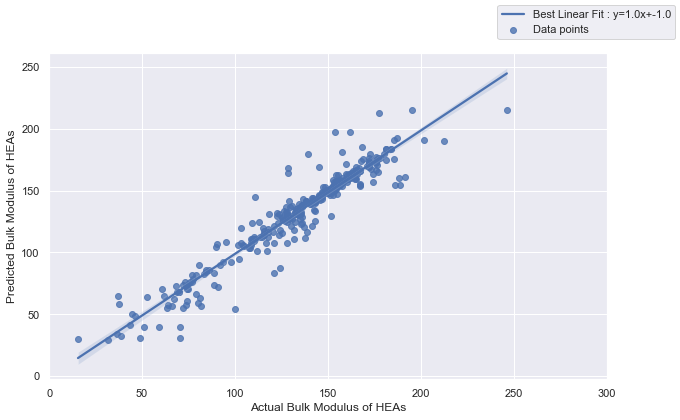

In [20]:
test_pred = XGBoost_regressor_model.predict(x_test_scaled).reshape(-1,1)[:,0]
print(test_pred.shape)
print(np.array(y_test).reshape(-1,1).shape)

d = {'Actual': list(test_pred), 'Predicted': list(np.array(y_test).reshape(-1,1)[:,0])} #['Mean_BulkModulus']
df = pd.DataFrame(d)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df
sns.set_theme(color_codes=True)
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlim(0, 300)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Actual'],df['Predicted'])
sns.regplot(x = 'Actual',y = 'Predicted',data = df,line_kws={'label':"Best Linear Fit : " + "y={0:.1f}x+{1:.1f}".format(slope,intercept)},label='Data points')
plt.xlabel('Actual Bulk Modulus of HEAs')
plt.ylabel('Predicted Bulk Modulus of HEAs')
fig.legend()
plt.show()